In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, beta
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from mlscorecheck.auc import (
    auc_onmin_grad,
    auc_rmin_grad,
    auc_max_grad,
    auc_maxa_grad,
    macc_min_grad,
    acc_rmax_grad,
    auc_from,
    auc_from_aggregated
)
from sklearn.linear_model import LinearRegression

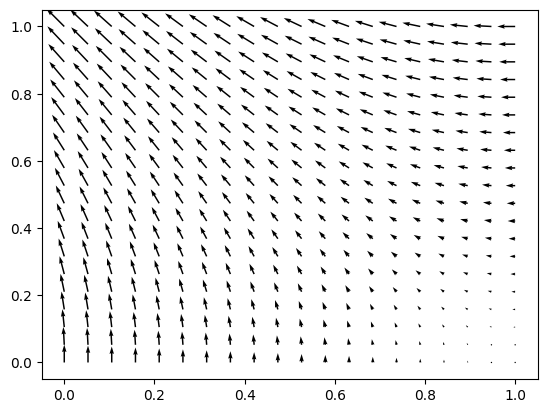

In [377]:
fpr = np.linspace(0.0, 1.0, 20)
tpr = np.linspace(0.0, 1.0, 20)
fpr = np.repeat(fpr, 20, 0)
tpr = np.hstack([tpr]*20)
dx = - tpr
dy = 1 - fpr
plt.quiver(fpr, tpr, dx, dy)

In [378]:
np.atan2(1, 100)

np.float64(0.009999666686665238)

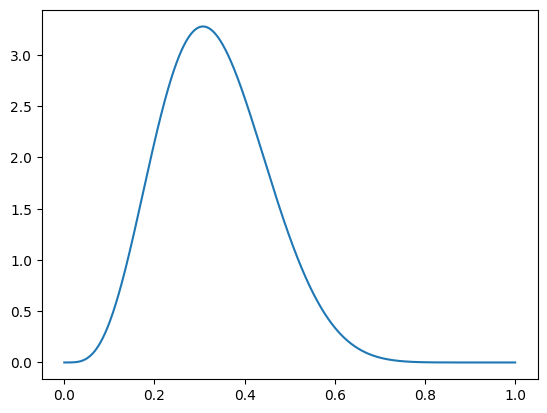

In [379]:
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 5, 10)
plt.plot(x, (y))

In [380]:
beta.pdf(0.2, 10, 20)

np.float64(1.477953873055371)

In [381]:
def expected_value(a, b, start, end, n):
    aucs = np.linspace(start, end, n)
    dx = (end - start)/n
    norm = beta.cdf(end, a, b) - beta.cdf(start, a, b)
    pdfs = beta.pdf(aucs, a, b)
    pdfs = pdfs / norm
    return np.sum(aucs * pdfs)*dx

In [382]:
expected_value(1146, 1150 - 1146, 0.9091, 0.9965, 100000)

np.float64(0.9951574936863115)

In [383]:
expected_value(2, 10, 0.0, 0.4, 1000)

np.float64(0.15740085031641243)

In [384]:
#label = 'aggregated-ns'
#clabel = 'avg.'

label = 'aggregated3'
clabel = 'avg.'

#label = 'single3'
#clabel = ''

In [385]:
results = []

In [386]:
data = pd.read_csv(f'processed-{label}.csv')

In [387]:
data2 = pd.read_csv(f'processed-{label}.csv')

In [388]:
data2 = data2[(data2['sens'] > 0.0) & (data2['sens'] < 1.0) & (data2['spec'] > 0.0) & (data2['spec'] < 1.0)]
data2 = data2[(data2['best_sens'] > 0.0) & (data2['best_sens'] < 1.0) & (data2['best_spec'] > 0.0) & (data2['best_spec'] < 1.0)]

(array([1.000e+00, 5.600e+01, 2.610e+02, 4.620e+02, 7.130e+02, 7.910e+02,
        1.097e+03, 9.340e+02, 1.287e+03, 1.481e+03]),
 array([0.51780303, 0.56598939, 0.61417576, 0.66236212, 0.71054848,
        0.75873485, 0.80692121, 0.85510758, 0.90329394, 0.9514803 ,
        0.99966667]),
 <BarContainer object of 10 artists>)

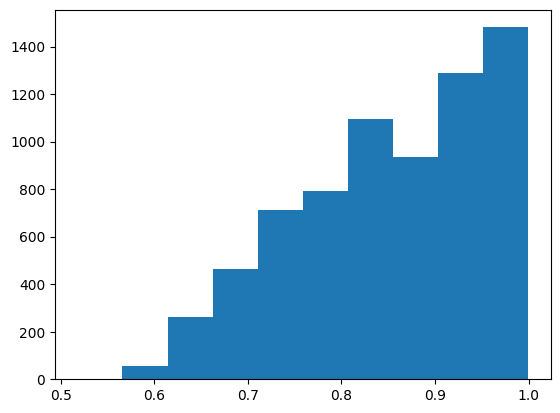

In [389]:
plt.hist(data2['auc'])

In [390]:
data = data[(data['sens'] > 0.0) & (data['sens'] < 1.0) & (data['spec'] > 0.0) & (data['spec'] < 1.0)]
data = data[(data['best_sens'] > 0.0) & (data['best_sens'] < 1.0) & (data['best_spec'] > 0.0) & (data['best_spec'] < 1.0)]
#data = data[(data['n']/data['p'] > 3) | (data['p']/data['n'] > 3)]
#data = data[(data['sens'] >= (1 - data['spec']))]
#data = data[data['p']*data['n'] < 1000]
#data = data[data['sens'] < 0.5]
#data = data[data['n'] > data['p']]
#data = data[data['dataset'].isin(['australian', 'yeast1', 'pima', 'crx'])]
#data = data[data['n_nodes'] < 5]

print(len(data))

data = data[data['n_nodes'] > 10]

"""data = pd.concat([
    #data[(data['auc'] >= 0.5) & (data['auc'] <= 0.55)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.55) & (data['auc'] <= 0.6)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.6) & (data['auc'] <= 0.65)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.65) & (data['auc'] <= 0.7)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.7) & (data['auc'] <= 0.75)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.75) & (data['auc'] <= 0.8)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.8) & (data['auc'] <= 0.85)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.85) & (data['auc'] <= 0.9)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.9) & (data['auc'] <= 0.95)].sample(50, random_state=5, replace=True),
    data[(data['auc'] > 0.95) & (data['auc'] <= 1.0)].sample(50, random_state=5, replace=True),
    ])"""

#data = data[data['auc'] > 0.75]

#data = data[data['n'] / data['p'] > 2]
#data = data[np.sqrt(data['sens'] * data['spec']) > 0.5]

7083


"data = pd.concat([\n    #data[(data['auc'] >= 0.5) & (data['auc'] <= 0.55)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.55) & (data['auc'] <= 0.6)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.6) & (data['auc'] <= 0.65)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.65) & (data['auc'] <= 0.7)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.7) & (data['auc'] <= 0.75)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.75) & (data['auc'] <= 0.8)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.8) & (data['auc'] <= 0.85)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.85) & (data['auc'] <= 0.9)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.9) & (data['auc'] <= 0.95)].sample(50, random_state=5, replace=True),\n    data[(data['auc'] > 0.95) & (data['auc'] <= 1.0)].sample(50, random_state=5, replace=True),\n    ])"

In [391]:
def auc_analytic(row):
    frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])

    exp_tpr = np.log(row['sens'])/np.log(frac)
    exp_fpr = np.log(1 - row['spec'])/np.log(frac)

    x = np.linspace(0, 1, 100)
    tpr = x**exp_tpr
    fpr = x**exp_fpr

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [392]:
np.logspace(-3, 0, 50)

array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])

In [393]:
def max_acc_analytic(auc, p, n):
    fpr = np.logspace(0, 2, 100)
    tpr = (1 - auc)*fpr/auc

    n_fracs = min(p + n, 1000)

    frac = np.linspace(0, 1, n_fracs)

    acc = (p*frac**tpr[:, None] + n*(1 - frac**fpr[:, None])) / (p + n)

    return np.max(acc)


In [394]:
from scipy.stats import beta

In [395]:
def auc_dist(fpr, tpr, p, n):
    frac = ((tpr * p) + (fpr * n)) / (p + n)

    fprs = beta.rvs(fpr*n, n - fpr*n, size=100000)
    fprs_pdf = beta.pdf(fprs, fpr*n, n - fpr*n)

    tprs = (frac * (p + n) - fprs*n)/p

    mask = (tprs >= 0) & (tprs <= 1)

    fprs = fprs[mask]
    fprs_pdf = fprs_pdf[mask]
    tprs = tprs[mask]

    tprs_pdf = beta.pdf(tprs, tpr*p, p - tpr*p)

    alpha_exp = np.log(fprs) / np.log(frac)
    beta_exp = np.log(tprs) / np.log(frac)

    count = min(len(alpha_exp), len(beta_exp))

    alpha_exp = alpha_exp[:count]
    beta_exp = beta_exp[:count]
    tprs_pdf = tprs_pdf[:count]
    fprs_pdf = fprs_pdf[:count]

    #print(alpha_exp, beta_exp)

    aucs = alpha_exp / (alpha_exp + beta_exp)
    weights = fprs_pdf * tprs_pdf

    mask = ~np.isnan(aucs) & (aucs >= 0.5)
    aucs = aucs[mask]
    weights = weights[mask]

    return np.sum(aucs * weights)/np.sum(weights)

In [341]:
auc_analytic(0.2, 0.8, 10, 20)
auc_analytic(1.0 - 0.9768, 0.7763, 30000, 300000)

np.float64(0.9381462513856837)

In [343]:
auc_dist(0.2, 0.8, 10, 20)
auc_dist(1.0 - 0.9768, 0.7763, 30000, 180000)

np.float64(0.9369685156774442)

In [331]:
#auc_expected(0.2, 0.8, 10, 20)
auc_expected(0.03, 0.75, 2000, 18000)

np.float64(0.9408415727361927)

In [396]:
def auc_expected(fpr, tpr, p, n):
    fprs = np.linspace(1/n, 1 - 1/n, n-1)
    tprs = np.linspace(1/p, 1 - 1/p, p-1)

    pairs = np.vstack([
        np.repeat(fprs, len(tprs)), 
        np.tile(tprs, len(fprs))
    ]).T

    pairs = pairs[np.random.choice(np.arange(len(pairs)), min(p*n, 500), replace=False)]

    fprs = pairs[:, 0]
    tprs = pairs[:, 1]

    fprs_pdf = beta.pdf(fprs, fpr*n, n - fpr*n)
    tprs_pdf = beta.pdf(tprs, tpr*p, p - tpr*p)

    weights = fprs_pdf * tprs_pdf
    aucs = np.array([auc_analytic(fpr, tpr, p, n) for fpr, tpr in zip(fprs, tprs)])

    mask = aucs >= 0.5
    aucs = aucs[mask]
    weights = weights[mask]

    return np.sum(aucs*weights)/np.sum(weights)
    

In [397]:
def auc_analytic(fpr, tpr, p, n):
    frac = ((tpr * p) + (fpr * n)) / (p + n)
    search_tpr = np.logspace(-3, 0, 200)
    search_fpr = np.logspace(0, 2, 200)
    
    exps = np.vstack([
        np.repeat(search_fpr, len(search_tpr)), 
        np.tile(search_tpr, len(search_fpr))
    ]).T

    aucs = exps[:, 0]/(exps[:, 0] + exps[:, 1])

    mask = aucs >= 0.5

    exps = exps[mask]
    aucs = aucs[mask]

    if len(exps) == 0:
        return 0.5

    diffs_fpr = np.abs(frac**exps[:, 0] - fpr)
    diffs_tpr = np.abs(frac**exps[:, 1] - tpr)

    minimum = np.argmin(diffs_fpr**2 + diffs_tpr**2)

    exp_fpr = exps[minimum, 0]
    exp_tpr = exps[minimum, 1]

    return exp_fpr / (exp_tpr + exp_fpr)

In [398]:
def auc_analytic_best(fpr, tpr, p, n):
    frac = ((tpr * p) + (fpr * n)) / (p + n)
    best_acc = (tpr * p + (1 - fpr) * n)/(p + n)

    search_tpr = np.logspace(-3, 0, 100)
    search_fpr = np.logspace(0, 2, 100)

    n_fracs = min(p + n, 1000)

    x = np.linspace(0, 1, n_fracs)
    
    exps = np.vstack([
        np.repeat(search_fpr, len(search_tpr)), 
        np.tile(search_tpr, len(search_fpr))
    ]).T

    aucs = exps[:, 0]/(exps[:, 0] + exps[:, 1])

    mask = aucs >= 0.5

    exps = exps[mask]
    aucs = aucs[mask]

    accs = np.max(((1 - x**exps[:, 0, None]) * n + x**exps[:, 1, None] * p)/(p + n), axis=1)

    print(np.min(accs), np.max(accs))

    mask = accs >= best_acc

    exps = exps[mask]
    aucs = aucs[mask]

    if len(exps) == 0:
        return 0.5

    diffs_fpr = np.abs(frac**exps[:, 0] - fpr)
    diffs_tpr = np.abs(frac**exps[:, 1] - tpr)

    minimum = np.argmin(diffs_fpr**2 + diffs_tpr**2)

    exp_fpr = exps[minimum, 0]
    exp_tpr = exps[minimum, 1]

    return exp_fpr / (exp_tpr + exp_fpr)

In [399]:
def auc_analytic_mod(row):
    frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])
    sens_orig = row['sens']
    spec_orig = row['spec']

    search_tpr = np.logspace(-2, 0, 100)
    search_fpr = np.logspace(0, 2, 100)

    p = row['p']
    n = row['n']

    x = np.linspace(0.00001, 1, 100)

    dist = np.inf

    for exp0 in search_tpr:
        for exp1 in search_fpr:
            sens = frac ** exp0
            fpr = frac ** exp1 

            tprs = x**exp0
            fprs = x**exp1

            auc = float(np.sum((fprs[1:] - fprs[:-1])*(tprs[:-1] + tprs[1:])/2))

            if auc < 0.5:
                continue

            dist_tmp = max((np.abs(sens - sens_orig)/sens_orig)**2, (np.abs((1 - fpr) - spec_orig)/spec_orig)**2)
            if dist_tmp < dist:
                dist = dist_tmp
                exp_tpr = exp0
                exp_fpr = exp1

    if dist == np.inf:
        exp_tpr = 1
        exp_fpr = 1
    
    #print(exp_tpr, exp_fpr)
    #print(exp_tpr, exp_fpr)

    tpr = x**exp_tpr
    fpr = x**exp_fpr

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [180]:
"""%%timeit 
auc_analytic(0.2, 0.8, 10, 20)"""

'%%timeit \nauc_analytic(0.2, 0.8, 10, 20)'

/tmp/ipykernel_1205/2334181201.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(aucs * weights)/np.sum(weights)


np.float64(nan)

In [181]:
"""%%timeit 
auc_analytic_mod({'spec': 0.8, 'sens': 0.8, 'p': 10, 'n': 20})"""

"%%timeit \nauc_analytic_mod({'spec': 0.8, 'sens': 0.8, 'p': 10, 'n': 20})"

In [182]:
"""def auc_analytic_best(row):
    frac = (row['best_sens']*row['p'] + (1 - row['best_spec'])*row['n']) / (row['p'] + row['n'])
    acc = row['best_acc']

    exp_tpr = np.log(row['best_sens'])/np.log(frac)
    exp_fpr = np.log(1 - row['best_spec'])/np.log(frac)

    x = np.linspace(0, 1, 100)
    tpr = x**exp_tpr
    fpr = x**exp_fpr

    accs = (row['p'] * tpr + (1 - fpr) * row['n']) / (row['p'] + row['n'])
    cap_mask = accs > acc

    tpr[cap_mask] = (acc * (row['p'] + row['n']) - (1 - fpr[cap_mask]) * row['n'])/row['p']

    #print(exp_tpr, exp_fpr)
    
    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))"""

"def auc_analytic_best(row):\n    frac = (row['best_sens']*row['p'] + (1 - row['best_spec'])*row['n']) / (row['p'] + row['n'])\n    acc = row['best_acc']\n\n    exp_tpr = np.log(row['best_sens'])/np.log(frac)\n    exp_fpr = np.log(1 - row['best_spec'])/np.log(frac)\n\n    x = np.linspace(0, 1, 100)\n    tpr = x**exp_tpr\n    fpr = x**exp_fpr\n\n    accs = (row['p'] * tpr + (1 - fpr) * row['n']) / (row['p'] + row['n'])\n    cap_mask = accs > acc\n\n    tpr[cap_mask] = (acc * (row['p'] + row['n']) - (1 - fpr[cap_mask]) * row['n'])/row['p']\n\n    #print(exp_tpr, exp_fpr)\n    \n    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))"

In [400]:
def auc_analytic_best_mod(row):
    frac = (row['best_sens']*row['p'] + (1 - row['best_spec'])*row['n']) / (row['p'] + row['n'])

    n_right = int(frac*(row['p'] + row['n']))
    n_left = (row['p'] + row['n']) - n_right

    print(frac, n_left, n_right)

    acc = row['best_acc']

    #search_tpr = np.linspace(10**(-2), 10**1, 100)
    #search_tpr = np.linspace(0.0001, 10, 100)
    #search_fpr = np.linspace(10**0, 10**1, 40)
    search_tpr = np.logspace(-2, 0, 100)
    search_fpr = np.logspace(0, 2, 100)

    #search_tpr = np.hstack([search_tpr0, search_fpr0])
    #search_fpr = np.hstack([search_tpr0, search_fpr0])

    best_sens = row['best_sens']
    best_spec = row['best_spec']
    p = row['p']
    n = row['n']

    """if n_left < 20:
        best_spec = best_spec ** (20 - n_left + 1)

    if n_right < 20:
        best_sens = best_sens ** (1.0 / (20 - n_right + 1))"""

    print(best_spec, best_sens)

    x = np.linspace(0.00001, 1, 100)

    dist = np.inf

    for exp0 in search_tpr:
        for exp1 in search_fpr:
            sens = frac ** exp0
            fpr = frac ** exp1 

            max_acc = (x**exp0 * p + (1 - x**exp1) * n) / (p + n)
            #print(exp0, exp1, np.max(max_acc), acc)

            tprs = x**exp0
            fprs = x**exp1

            auc = float(np.sum((fprs[1:] - fprs[:-1])*(tprs[:-1] + tprs[1:])/2))

            penalty_frac = (1 - min(frac, 1.0 - frac))

            dist_sens = (np.abs(sens - best_sens)**2)# / ((sens + best_sens)/2))
            dist_spec = (np.abs((1 - fpr) - best_spec)**2)# / (((1 - fpr) + best_spec)/2))

            #dist_exp = (np.abs(exp0 - 1/exp1)/(exp0 + 1/exp1)/2)*penalty_frac

            dist_score = (dist_sens + dist_spec)/2
            dist_penalty = (frac * (1 - fpr) + (1 - frac) * sens)

            dist_tmp = dist_score# * dist_penalty

            #print("%.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f %.3f" % 
            #      (exp0, exp1, dist_tmp, dist_sens, dist_spec, dist_exp, dist, auc, np.max(max_acc), acc, frac, best_sens, sens, best_spec, 1 - fpr))

            #print("%.3f %.3f %.3f %.3f %.3f %.3f" %
            #      (exp0, exp1, dist_score, dist_penalty, dist_tmp, dist))

            if auc < 0.5:
                continue

            if np.max(max_acc) > acc:
                continue

            if dist_tmp < dist:
                dist = dist_tmp
                exp_tpr = exp0
                exp_fpr = exp1

    if dist == np.inf:
        exp_tpr = 1
        exp_fpr = 1
    
    print(exp_tpr, exp_fpr)

    tpr = x**exp_tpr
    fpr = x**exp_fpr

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [184]:
auc_analytic_best(0.3, 0.6, 10, 20)

0.6666666666666666 0.9999515395449878


np.float64(0.6978970340724481)

In [185]:
auc_analytic_best_mod({'best_spec': 0.7, 'best_sens': 0.6, 'p': 10, 'n': 20, 'best_acc': (0.6*10 + 0.7*20)/(30)})

0.4 18 12
0.7 0.6


0.9545484566618342 1.0


0.5116238018564664

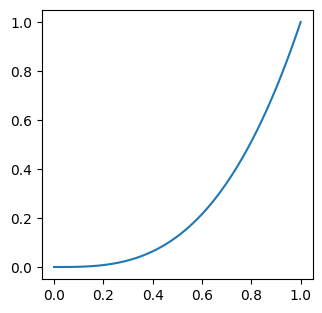

In [186]:

x = np.linspace(0, 1, 1000)
y = x**3


plt.figure(figsize=(3.5, 3.5))

plt.plot(x, y)


In [304]:
data['auc_dist'] = data.apply(lambda row: auc_dist(1 - row['spec'], row['sens'], row['p'], row['n']), axis=1)

In [325]:
data['auc_expected'] = data.apply(lambda row: auc_expected(1 - row['spec'], row['sens'], row['p'], row['n']), axis=1)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [401]:
data['auc_analytic'] = data.apply(auc_analytic_mod, axis=1)

In [187]:
data['auc_analytic'] = data.apply(auc_analytic_mod, axis=1)
data['auc_analytic_best'] = data.apply(lambda row: auc_analytic_best(1 - row['spec'], row['sens'], row['p'], row['n']), axis=1)

0.7104377104377104 0.999917466329105
0.5120481927710844 0.9999387107693773
0.5120481927710844 0.9999361593818413
0.7104377104377104 0.9999611295732497
0.6493506493506493 0.9999537336257768
0.9455782312925171 0.9999086485002631
0.549618320610687 0.9999323072898025
0.6559139784946236 0.9999210672189665
0.5120481927710844 0.9999361593818413
0.6744186046511628 0.9999178467085069
0.9455782312925171 0.9999916049411279
0.647887323943662 0.9999537956198844
0.9455782312925171 0.9999916049411279
0.5120481927710844 0.9999361593818413
0.549618320610687 0.9999323072898025
0.7104377104377104 0.9999611295732497
0.7647058823529411 0.9999677857498979
0.7647058823529411 0.9999677857498979
0.647887323943662 0.9999223892481388
0.6559139784946236 0.9999210672189665
0.7419354838709677 0.9999149607864868
0.7104377104377104 0.999917466329105
0.5797101449275363 0.999945273073204
0.5120481927710844 0.9999361593818413
0.647887323943662 0.9999223892481388
0.6493506493506493 0.9999226838122018
0.5797101449275363 0

In [188]:
data['auc_analytic_best_mod'] = data.apply(auc_analytic_best_mod, axis=1)

0.7811447811447811 65 232
0.5 0.8957345971563981
0.49770235643321115 2.782559402207125
0.40963855421686746 98 68
0.9176470588235294 0.7530864197530864
0.327454916287773 2.782559402207125
0.5843373493975903 70 96
0.7530864197530864 0.9058823529411764
0.2848035868435802 2.420128264794382
0.20202020202020207 237 60
0.919431279620853 0.5
0.4534878508128584 1.5199110829529336
0.14935064935064934 131 23
0.98 0.3888888888888889
0.49770235643321115 1.7475284000076838
0.9591836734693876 7 140
0.5 0.9856115107913668
0.37649358067924693 16.297508346206442
0.5725190839694656 56 75
0.864406779661017 0.9305555555555556
0.1788649529057435 3.511191734215132
0.6666666666666666 31 62
0.59375 0.8032786885245902
0.5462277217684343 2.205130739903046
0.463855421686747 89 77
0.8888888888888888 0.8
0.298364724028334 2.782559402207125
0.5581395348837209 19 24
0.9285714285714286 0.7931034482758621
0.43287612810830595 4.229242874389499
0.040816326530612373 141 6
0.9856115107913668 0.5
0.21544346900318845 1.04761

In [239]:
data['max_acc_analytic'] = data.apply(lambda row: max_acc_analytic(row['auc'], row['p'], row['n']), axis=1)

In [189]:
data[['auc_analytic_best', 'auc_analytic_best_mod']]

,auc_analytic_best,auc_analytic_best_mod
3,0.826111,0.848253
10,0.890246,0.894692
11,0.934101,0.894691
12,0.782316,0.770140
13,0.801470,0.778295
...,...,...
9974,0.909091,0.907134
9979,0.932655,0.936895
9984,0.845256,0.769981
9987,0.793964,0.828711


In [190]:
idx = 300
auc_analytic(data.iloc[idx]), auc_analytic_mod(data.iloc[idx]), data.iloc[idx]['auc']

TypeError: auc_analytic() missing 3 required positional arguments: 'tpr', 'p', and 'n'

In [1126]:
idx = 20
auc_analytic_best(data.iloc[idx]), auc_analytic_best_mod(data.iloc[idx]), data.iloc[idx]['auc']

0.08695652173913045 63 6
0.975 0.1724137931034483
0.7220809018385468 1.2618568830660204


(0.6651132016856247, 0.6360020336652561, np.float64(0.5603448275862069))

In [191]:
data[['auc', 'auc_analytic', 'auc_analytic_best', 'auc_analytic_best_mod']].describe()

,auc,auc_analytic,auc_analytic_best,auc_analytic_best_mod
count,2426.000000,2426.000000,2426.000000,2426.000000
mean,0.850205,0.862010,0.861826,0.858533
std,0.091332,0.090159,0.089950,0.099559
min,0.516667,0.534821,0.529040,0.511624
25%,0.792812,0.808745,0.812339,0.793871
50%,0.864532,0.885599,0.885618,0.890226
75%,0.916902,0.927908,0.926571,0.928124
max,0.995787,0.995046,0.991574,0.990965


In [326]:
r2_score(data['auc'], data['auc_expected'])

0.8037405954165145

In [305]:
r2_score(data['auc'], data['auc_dist'])

0.8175204312568825

In [402]:
r2_score(data['auc'], data['auc_analytic'])

0.8455051213177313

In [193]:
r2_score(data['auc'], data['auc_analytic_best'])

0.8287053311819297

In [240]:
r2_score(data['max_acc_analytic'], data['best_acc'])

0.8622595371202075

In [194]:
#tmp = data[(data['p']/data['n'] < 5) & (data['n']/data['p'] < 5)]
tmp = data[data['auc'] >= 0.7]
r2_score(tmp['auc'], tmp['auc_analytic_best_mod']), len(data), len(tmp)

(0.5222546526423025, 2426, 2254)

In [195]:
r2_score(data['auc'], data['auc_analytic_best_mod'])

0.6158768313786254

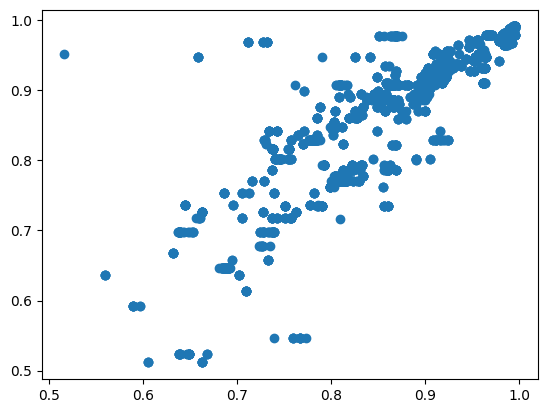

In [196]:
plt.scatter(data['auc'], data['auc_analytic_best_mod'])

In [197]:
tmp = data[np.abs(data['auc_analytic_best_mod'] - data['auc']) > 0.2]
tmp[['classifier', 'classifier_params', 'dataset', 'auc', 'auc_analytic_best_mod', 'best_sens', 'best_spec', 'best_acc', 'n_nodes']]

,classifier,classifier_params,dataset,auc,auc_analytic_best_mod,best_sens,best_spec,best_acc,n_nodes
413,RandomForestClassifier,"{'max_depth': 5, 'random_state': 5}",abalone9_18,0.727518,0.968940,0.978417,0.500000,0.952381,14
723,RandomForestClassifier,"{'max_depth': 4, 'random_state': 5}",abalone9_18,0.712230,0.968940,0.978417,0.500000,0.952381,14
972,RandomForestClassifier,"{'max_depth': 6, 'random_state': 5}",abalone9_18,0.732464,0.968940,0.978417,0.500000,0.952381,13
1188,RandomForestClassifier,"{'max_depth': 2, 'random_state': 5}",CM1,0.773333,0.546365,0.100000,0.988889,0.900000,22
1283,RandomForestClassifier,"{'max_depth': 5, 'random_state': 5}",abalone9_18,0.727518,0.968940,0.978417,0.500000,0.952381,14
1395,RandomForestClassifier,"{'max_depth': 8, 'random_state': 5}",CM1,0.760000,0.546365,0.100000,0.988889,0.900000,22
1681,RandomForestClassifier,"{'max_depth': 4, 'random_state': 5}",abalone9_18,0.712230,0.968940,0.978417,0.500000,0.952381,14
2233,RandomForestClassifier,"{'max_depth': 6, 'random_state': 5}",abalone9_18,0.732464,0.968940,0.978417,0.500000,0.952381,13
2247,RandomForestClassifier,"{'max_depth': 8, 'random_state': 5}",CM1,0.760000,0.546365,0.100000,0.988889,0.900000,22
2289,SVC,"{'probability': True, 'C': 0.07615066818763783}",CM1,0.516667,0.951488,0.988889,0.300000,0.920000,17


NameError: name 'simplify_roc' is not defined

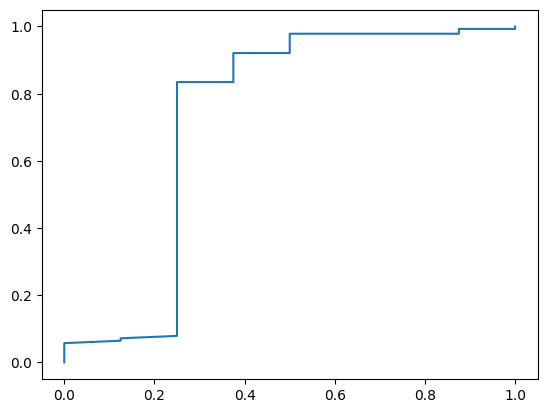

In [198]:
fprs = eval(tmp.iloc[0]['fprs'])
tprs = eval(tmp.iloc[0]['tprs'])
ths = eval(tmp.iloc[0]['thresholds'], {'inf': np.inf})
plt.plot(fprs, tprs)

fprs_, tprs_, ths_ = simplify_roc(fprs, tprs, ths)

plt.plot(fprs_, tprs_)

In [1135]:
def simplify_roc(fprs, tprs, ths):
    fprs_simp = [fprs[0]]
    tprs_simp = [tprs[0]]
    ths_simp = [ths[0]]

    for idx in range(1, len(fprs)-1):
        if fprs[idx] == fprs[idx+1] and fprs[idx-1] == fprs[idx]:
            continue
        if tprs[idx] == tprs[idx+1] and tprs[idx-1] == tprs[idx]:
            continue

        if np.abs((fprs[idx-1] + fprs[idx+1])/2 - fprs[idx]) < 1e-6 and np.abs((tprs[idx-1] + tprs[idx+1])/2 - tprs[idx]) < 1e-6:
            continue
        fprs_simp.append(fprs[idx])
        tprs_simp.append(tprs[idx])
        ths_simp.append(ths[idx])
    
    fprs_simp.append(fprs[-1])
    tprs_simp.append(tprs[-1])
    ths_simp.append(ths[-1])

    return fprs_simp, tprs_simp, ths_simp

In [1136]:
eval(tmp.iloc[0]['fprs'])

[0.0,
 0.0,
 0.125,
 0.125,
 0.25,
 0.25,
 0.375,
 0.375,
 0.5,
 0.5,
 0.625,
 0.625,
 1.0,
 1.0]

In [1137]:
eval(tmp.iloc[0]['tprs'])

[0.0,
 0.02158273381294964,
 0.05755395683453238,
 0.15827338129496402,
 0.16546762589928057,
 0.33093525179856115,
 0.33093525179856115,
 0.8345323741007195,
 0.8345323741007195,
 0.9640287769784173,
 0.9640287769784173,
 0.9784172661870504,
 0.9784172661870504,
 1.0]

In [1138]:
#data[np.abs(data['auc_analytic_best_mod'] - data['auc']) > 0.2].sample(10)

In [1139]:
#row = data[np.abs(data['auc_analytic_best_mod'] - data['auc']) > 0.2].iloc[0]
#row = data.iloc[10]

In [1140]:
#row[['best_acc', 'best_sens', 'best_spec', 'auc', 'auc_analytic', 'auc_analytic_best', 'auc_analytic_best_mod', 'classifier', 'classifier_params', 'p', 'n', 'n_nodes']]

In [1141]:
#auc_analytic(row)

In [1142]:
#auc_analytic_best_mod(row)

In [1143]:
#data = data[data['n_nodes'] > 10]

In [1144]:
row = data.iloc[400]

In [1145]:
row['auc']

np.float64(0.9563551202895464)

In [1146]:
frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])

exp_tpr = np.log(row['sens'])/np.log(frac)
exp_fpr = np.log(1 - row['spec'])/np.log(frac)

x = np.linspace(0, 1, 100)
tpr = x**exp_tpr
fpr = x**exp_fpr

np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2)

np.float64(0.9632639629936799)

In [1147]:
def r2_fun(row):

    tprs = np.array(eval(row['tprs']))
    fprs = np.array(eval(row['fprs']))
    ths = np.array(eval(row['thresholds'], {'inf': np.inf}))
    counts = (tprs * row['p'] + fprs * row['n']) / (row['p'] + row['n'])

    mask = tprs[1:] > 0

    ln_tprs = np.log(tprs[1:][mask])
    ln_counts = np.log(counts[1:][mask]).reshape(-1, 1)

    pred_tprs = LinearRegression(fit_intercept=False).fit(ln_counts, ln_tprs).predict(ln_counts)

    return r2_score(ln_tprs, pred_tprs)

In [1148]:
data['r2_tpr'] = data.apply(r2_fun, axis=1)

In [1149]:
r2 = data['r2_tpr'].values
print(len(r2[r2 < -1]))
r2 = r2[r2 > -1]

0


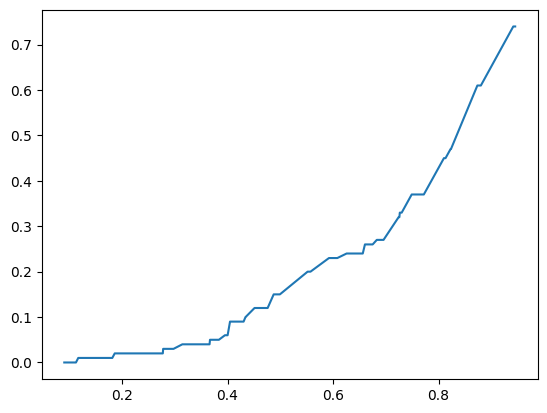

In [1150]:
idx = 304
plt.plot(eval(data.iloc[idx]['thresholds'], {'inf': np.inf}), 1.0 - np.array(eval(data.iloc[idx]['tprs'])))

In [1156]:
row = data.iloc[304]
tprs = np.array(eval(row['tprs']))
fprs = np.array(eval(row['fprs']))
ths = np.array(eval(row['thresholds'], {'inf': np.inf}))

len(tprs), len(fprs), len(ths)

(47, 47, 47)

In [1151]:

counts = (tprs * row['p'] + fprs * row['n']) / (row['p'] + row['n'])

mask = tprs[1:] > 0

ln_tprs = np.log(tprs[1:][mask])
ln_counts = np.log(counts[1:][mask]).reshape(-1, 1)

pred_tprs = LinearRegression(fit_intercept=False).fit(ln_counts, ln_tprs).predict(ln_counts)

r2_score(ln_tprs, pred_tprs), row['auc']

(0.937500135096883, np.float64(0.8533333333333334))

In [1152]:
tprs, fprs, ths, counts

(array([0.  , 0.26, 0.26, 0.39, 0.39, 0.53, 0.53, 0.55, 0.55, 0.63, 0.63,
        0.67, 0.67, 0.68, 0.68, 0.73, 0.73, 0.74, 0.74, 0.76, 0.76, 0.77,
        0.77, 0.8 , 0.8 , 0.85, 0.85, 0.88, 0.88, 0.9 , 0.9 , 0.91, 0.91,
        0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.99,
        0.99, 1.  , 1.  ]),
 array([0.        , 0.        , 0.01851852, 0.01851852, 0.03703704,
        0.03703704, 0.05555556, 0.05555556, 0.07407407, 0.07407407,
        0.09259259, 0.09259259, 0.12962963, 0.12962963, 0.14814815,
        0.14814815, 0.18518519, 0.18518519, 0.2037037 , 0.2037037 ,
        0.25925926, 0.25925926, 0.27777778, 0.27777778, 0.31481481,
        0.31481481, 0.35185185, 0.35185185, 0.46296296, 0.46296296,
        0.48148148, 0.48148148, 0.55555556, 0.55555556, 0.59259259,
        0.59259259, 0.62962963, 0.62962963, 0.7037037 , 0.7037037 ,
        0.75925926, 0.75925926, 0.90740741, 0.90740741, 0.98148148,
        0.98148148, 1.        ]),
 array([       inf, 0.94516433

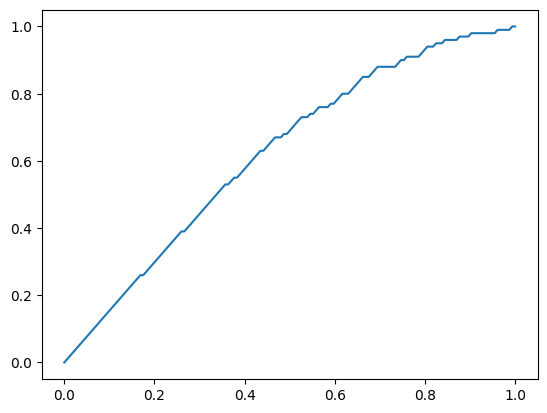

In [1153]:
plt.plot(counts, tprs)

ValueError: x and y must have same first dimension, but have shapes (46,) and (92,)

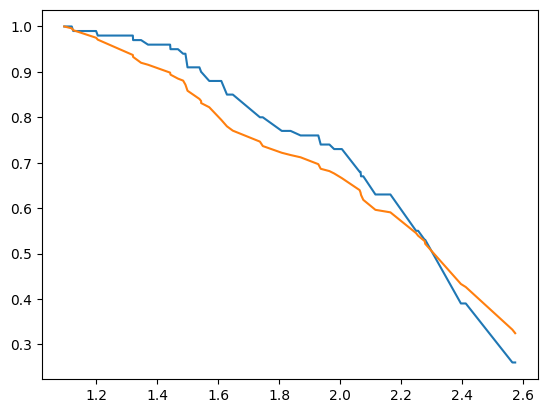

In [1159]:
plt.plot(np.exp(ths)[1:][mask], tprs[1:][mask], label='orig')
plt.plot(np.exp(ths)[1:][mask], np.exp(pred_tprs), label='pred')
plt.plot(np.exp(ths)[1:][mask], tprs_orig, label='raw')
plt.legend()

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         2.,  1.,  3.,  3.,  0.,  0.,  3.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  2.,  0.,  1.,  0.,  1.,  4.,  3.,  3.,  0.,  0.,  1.,
         2.,  0.,  0.,  0.,  1.,  2.,  0.,  3.,  0.,  8.,  4.,  6.,  5.,
         5.,  9.,  0.,  2.,  4., 11.,  1., 11.,  1.,  3.,  4.,  1.,  5.,
         1.,  7.,  1.,  7.,  4.,  2.,  8., 16., 19.,  2., 14., 10.,  3.,
        15., 32., 15., 41., 43., 16., 28., 23., 14.]),
 array([0.39757189, 0.40359042, 0.40960895, 0.41562748, 0.42164601,
        0.42766455, 0.43368308, 0.43970161, 0.44572014, 0.45173867,
        0.4577572 , 0.46377573, 0.46979426, 0.47581279, 0.48183132,
        0.48784985, 0.49386838, 0.49988691, 0.50590544, 0.51192397,
        0.5179425 , 0.52396103, 0.52997956, 0.53599809, 0.54201662,
        0.54803515, 0.55405368, 0.56007222, 0.56609075, 0.57210928,
        0.57812781, 0.5841

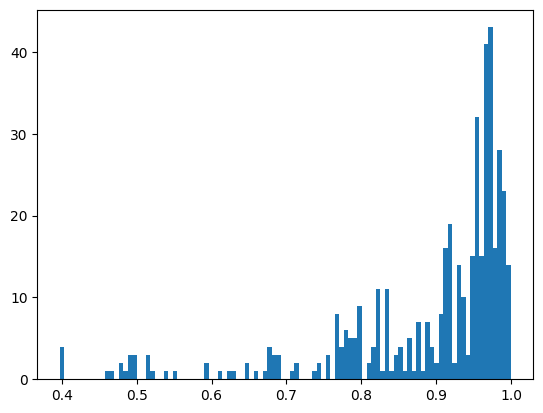

In [1160]:
plt.hist(r2, bins=100)

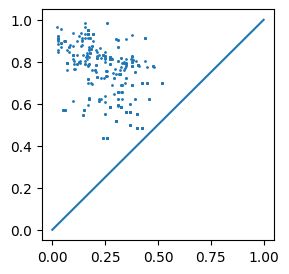

In [119]:
plt.figure(figsize=(3, 3))
plt.scatter(1 - data['spec'], data['sens'], s=1)
plt.plot([0, 1], [0, 1])

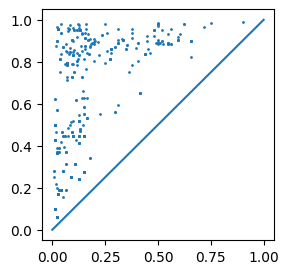

In [120]:
plt.figure(figsize=(3, 3))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1)
plt.plot([0, 1], [0, 1])

In [199]:
data.columns

Index(['dataset', 'acc', 'sens', 'spec', 'auc', 'best_acc', 'best_sens',
       'best_spec', 'threshold', 'best_threshold', 'p', 'n', 'n_nodes', 'fprs',
       'tprs', 'thresholds', 'classifier', 'classifier_params', 'auc_min',
       'auc_min_best', 'auc_rmin', 'auc_rmin_best', 'auc_grmin',
       'auc_grmin_best', 'auc_amin', 'auc_amin_best', 'auc_armin',
       'auc_armin_best', 'auc_onmin', 'auc_onmin_best', 'auc_max',
       'auc_max_best', 'auc_amax', 'auc_amax_best', 'auc_maxa',
       'auc_maxa_best', 'acc_min', 'acc_rmin', 'acc_max', 'acc_rmax',
       'acc_onmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax',
       'max_acc_onmax', 'auc_analytic', 'auc_analytic_best',
       'auc_analytic_best_mod'],
      dtype='object')

In [200]:
def convert(x):
    try:
        return float(x)
    except:
        return None

In [201]:
data['auc_min_max'] = (data['auc_min'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_max'] = (data['auc_rmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
#data['auc_onmin_max'] = (data['auc_onmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_maxa'] = (data['auc_rmin'].apply(convert) + data['auc_maxa'].apply(convert)) / 2.0

data['auc_min_max_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0
data['auc_rmin_max_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0

data['auc_min_maxa_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_rmin_maxa_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
#data['auc_onmin_maxa_best'] = ((data['auc_onmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0

data['max_acc_min_max'] = (data['max_acc_min'].apply(convert) + data['max_acc_max'].apply(convert)) / 2.0
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_rmax'].apply(convert)) / 2.0
#data['max_acc_min_onmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_onmax'].apply(convert)) / 2.0



In [202]:
data[['auc_min_best', 'auc_max_best', 'auc_min_max_best', 'best_acc', 'best_sens', 'best_spec', 'p', 'n']]

,auc_min_best,auc_max_best,auc_min_max_best,best_acc,best_sens,best_spec,p,n
3,0.447728,0.947928,0.697828,0.781145,0.895735,0.500000,211,86
10,0.690900,0.979699,0.835300,0.837349,0.753086,0.917647,81,85
11,0.682042,0.976795,0.829418,0.831325,0.905882,0.753086,85,81
12,0.459574,0.959774,0.709674,0.797980,0.500000,0.919431,86,211
13,0.380974,0.987841,0.684408,0.772727,0.388889,0.980000,54,100
...,...,...,...,...,...,...,...,...
9974,0.708165,0.975549,0.841857,0.839695,0.819444,0.864407,72,59
9979,0.784427,0.987822,0.886125,0.885542,0.913580,0.858824,81,85
9984,0.248077,0.994680,0.621379,0.952381,0.250000,0.992806,8,139
9987,0.492657,0.992857,0.742757,0.959184,0.500000,0.985612,8,139


In [203]:

data['auc_min_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='min',
    upper='max',
    correction=None
)), axis=1)



In [204]:
data['auc_rmin_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='max',
    correction=None
)), axis=1)

In [205]:
data['auc_rmin_rmax'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='rmax',
    correction=None
)), axis=1)

In [206]:
data['auc_onmin_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='onmin',
    upper='max',
    correction=None
)), axis=1)

In [207]:
data['auc_min_max_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='min',
    upper='max',
    correction=None
)), axis=1)

In [208]:
data['auc_rmin_maxa_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='maxa',
    correction=None
)), axis=1)

In [209]:
data['auc_onmin_maxa_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='onmin',
    upper='maxa',
    correction=None
)), axis=1)

In [210]:
data.head()

,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,...,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax,auc_rmin_rmax,auc_onmin_max,auc_onmin_maxa_best
3,yeast1,0.754209,0.810427,0.616279,0.805081,0.781145,0.895735,0.500000,0.711036,0.618373,...,0.737407,0.697828,0.763155,0.665709,0.731036,0.830163,0.826699,0.759219,0.820333,0.790778
10,mammographic,0.813253,0.827160,0.800000,0.903704,0.837349,0.753086,0.917647,0.484940,0.719226,...,0.821957,0.835300,0.852387,0.819012,0.836100,0.866792,0.865539,0.831130,0.889525,0.891245
11,mammographic,0.831325,0.905882,0.753086,0.852723,0.831325,0.905882,0.753086,0.515060,0.527273,...,0.830192,0.829418,0.847023,0.812587,0.830192,0.828404,0.825282,0.847023,0.903140,0.886308
12,yeast1,0.764310,0.616279,0.824645,0.816323,0.797980,0.500000,0.919431,0.288964,0.409398,...,0.749099,0.709674,0.773909,0.680238,0.744474,0.835934,0.832907,0.765032,0.826615,0.805309
13,pima,0.714286,0.740741,0.700000,0.807222,0.772727,0.388889,0.980000,0.348534,0.717136,...,0.741944,0.684408,0.777977,0.633824,0.727394,0.818035,0.813944,0.759746,0.821324,0.785559


In [211]:
#for col in data.columns[2:]:
#    data[col] = pd.to_numeric(data[col], errors='coerce')

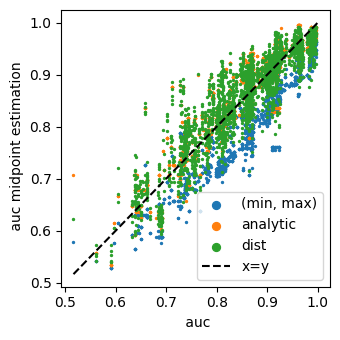

In [323]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_rmax'], label='(rmin, rmax)', s=2)
plt.scatter(data['auc'], data['auc_analytic'], label='analytic', s=2)
plt.scatter(data['auc'], data['auc_expected'], label='dist', s=2)
#plt.scatter(data['auc'], data['auc_onmin_max'], label='(onmin, max)', s=2)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

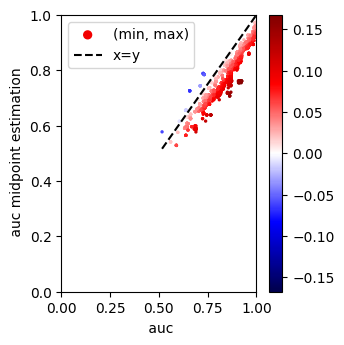

In [213]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max']
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
diff = np.max(np.abs((data['auc'] - data['auc_min_max']).values))
sc = plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

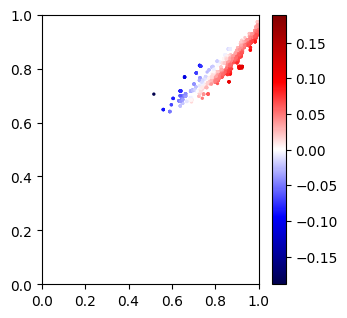

In [214]:
plt.figure(figsize=(3.5, 3.5))
z = data['auc'] - data['auc_rmin_max']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_max']).values))
sc = plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

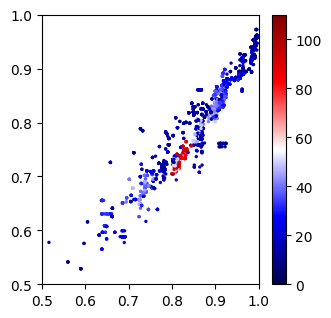

In [215]:
plt.figure(figsize=(3.5, 3.5))
z = data['n_nodes']
diff = np.max(np.abs((data['n_nodes']).values))
sc = plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2, c=z, cmap=cm, vmin=0, vmax=diff)
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.colorbar()

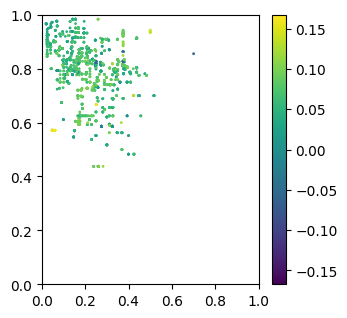

In [216]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('viridis')
z = data['auc'] - data['auc_min_max']
diff = np.max(np.abs((data['auc'] - data['auc_min_max']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

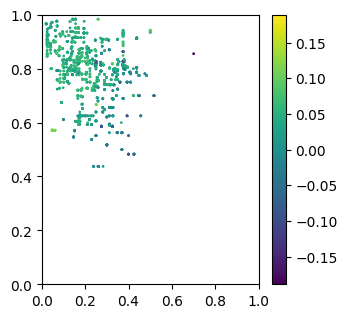

In [217]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('viridis')
z = data['auc'] - data['auc_rmin_max']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_max']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

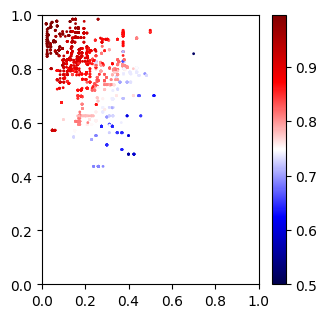

In [218]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc']
diff = np.max(np.abs((data['auc']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=0.5, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

In [219]:
def rline_intersect(sens, spec):
    a = (1 - sens)/(1 - spec)
    b = sens - a*spec
    se0 = (a + b)/(1 + a)
    sp0 = 1 - se0
    return se0, sp0

def rcirc_intersect(sens, spec):
    a = (1 - sens)/(1 - spec)
    b = sens - a*spec
    se0 = (2*b + np.sqrt(4*b**2 - 4*(1 + a**2)*(b**2 - a**2)))/(2*(1 + a**2))
    sp0 = np.sqrt(1 - se0**2)
    return se0, sp0

In [220]:
se = 0.8
sp = 0.9
se0, sp0 = rline_intersect(se, sp)
se1, sp1 = rcirc_intersect(se, sp)

se0, sp0, se1, sp1

(0.3333333333333333, 0.6666666666666667, np.float64(0.6), np.float64(0.8))

0.5166666666666666


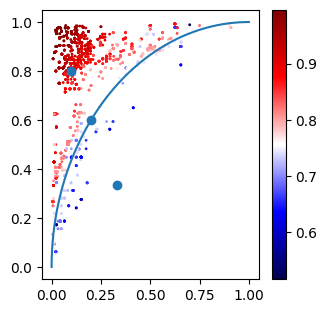

In [221]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc']
diff = np.max(np.abs((data['auc']).values))
vmin = np.min(np.abs((data['auc']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=vmin, vmax=diff)
#plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=0.5, vmax=diff, marker='x')
plt.colorbar()
plt.scatter([1 - sp, 1 - sp0, 1 - sp1], [se, se0, se1])
circ = np.linspace(-3.1415/2, 0, 1000)
x = np.sin(circ) + 1
y = np.cos(circ)
plt.plot(x, y)
print(vmin)


In [222]:
tmp = data[['auc', 'auc_rmin_max']].dropna()
tmp3 = data[['auc', 'auc_rmin_rmax']].dropna()
tmp1 = data[['auc', 'auc_onmin_max']].dropna()
tmp2 = data[['auc', 'auc_min_max', 'auc_analytic']].dropna()
(r2_score(tmp2['auc'], tmp2['auc_min_max']),
r2_score(tmp['auc'], tmp['auc_rmin_max']),
r2_score(tmp3['auc'], tmp3['auc_rmin_rmax']),
r2_score(tmp1['auc'], tmp1['auc_onmin_max']),
r2_score(tmp2['auc'], tmp2['auc_analytic']))

(0.41779500862639174,
 0.7181330759215744,
 0.7212994258107523,
 0.8038426522817577,
 0.8278908754491077)

In [223]:
(mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_min_max']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max']))

(np.float64(0.07638940872206501), np.float64(0.04954797395471221))

In [224]:
len(data), len(tmp)

(2426, 2426)

In [225]:
data

,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,...,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax,auc_rmin_rmax,auc_onmin_max,auc_onmin_maxa_best
3,yeast1,0.754209,0.810427,0.616279,0.805081,0.781145,0.895735,0.500000,0.711036,0.618373,...,0.737407,0.697828,0.763155,0.665709,0.731036,0.830163,0.826699,0.759219,0.820333,0.790778
10,mammographic,0.813253,0.827160,0.800000,0.903704,0.837349,0.753086,0.917647,0.484940,0.719226,...,0.821957,0.835300,0.852387,0.819012,0.836100,0.866792,0.865539,0.831130,0.889525,0.891245
11,mammographic,0.831325,0.905882,0.753086,0.852723,0.831325,0.905882,0.753086,0.515060,0.527273,...,0.830192,0.829418,0.847023,0.812587,0.830192,0.828404,0.825282,0.847023,0.903140,0.886308
12,yeast1,0.764310,0.616279,0.824645,0.816323,0.797980,0.500000,0.919431,0.288964,0.409398,...,0.749099,0.709674,0.773909,0.680238,0.744474,0.835934,0.832907,0.765032,0.826615,0.805309
13,pima,0.714286,0.740741,0.700000,0.807222,0.772727,0.388889,0.980000,0.348534,0.717136,...,0.741944,0.684408,0.777977,0.633824,0.727394,0.818035,0.813944,0.759746,0.821324,0.785559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,crx,0.824427,0.861111,0.779661,0.878884,0.839695,0.819444,0.864407,0.545977,0.666667,...,0.826790,0.841857,0.854756,0.828161,0.841060,0.850263,0.848378,0.837428,0.894910,0.895042
9979,mammographic,0.861446,0.864198,0.858824,0.911184,0.885542,0.913580,0.858824,0.484940,0.435977,...,0.867677,0.886125,0.893140,0.879128,0.886144,0.872960,0.871904,0.871190,0.921183,0.930016
9984,abalone9_18,0.789116,0.750000,0.791367,0.827338,0.952381,0.250000,0.992806,0.058219,0.389619,...,0.812354,0.621379,0.762103,0.613069,0.753793,0.968094,0.967598,0.797267,0.859286,0.799731
9987,abalone9_18,0.816327,0.625000,0.827338,0.783273,0.959184,0.500000,0.985612,0.058219,0.454090,...,0.793144,0.742757,0.805432,0.738275,0.800949,0.966895,0.966063,0.768851,0.830738,0.863349


In [226]:
"""tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"""

"tmp = data.dropna()\nwilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), \n         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"

In [227]:
results.append({'target': ['auc', 'auc'],
                'source': ['arbitrary sens, spec', 'arbitrary sens, spec'],
                'estimation': ['(min, max)', '(rmin, max)'],
                'r2': [r2_score(tmp2['auc'], tmp2['auc_min_max']),
                       r2_score(tmp['auc'], tmp['auc_rmin_max'])],
                'mape': [mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_min_max']),
                         mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max'])]})

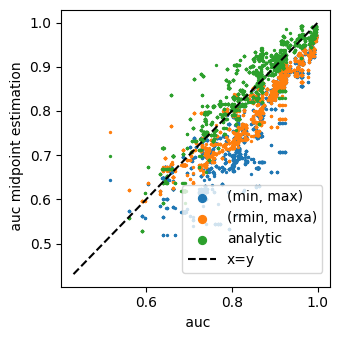

In [228]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), 
              min(data['auc_min_max_best']),
              min(data['auc_rmin_max_best']),
              min(data['auc_min_maxa_best']),
              min(data['auc_rmin_maxa_best']),
              min(data['auc_onmin_maxa_best'])
              )
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(data['auc'], data['auc_min_max_best'], label='(min, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_max_best'], label='(rmin, max)', s=2)
#plt.scatter(data['auc'], data['auc_min_maxa_best'], label='(min, maxa)', s=2)
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=2)
#plt.scatter(data['auc'], data['auc_onmin_maxa_best'], label='(onmin, maxa)', s=2)
#plt.scatter(data['auc'], data['auc_analytic_best'], label='analytic', s=2)
plt.scatter(data['auc'], data['auc_analytic_best'], label='analytic', s=2)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4, loc=(0.45, 0.05))
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-macc-midpoint.pdf')

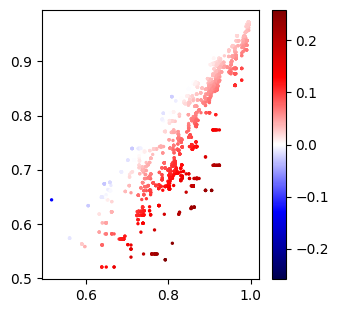

In [229]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(data['auc'], data['auc_min_max_best'], label='(rmin, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

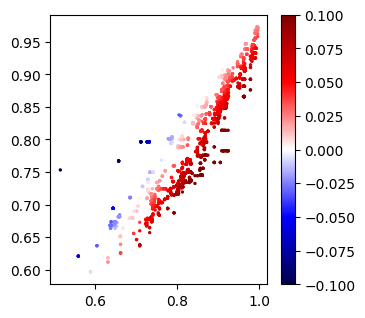

In [230]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_rmin_maxa_best']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_maxa_best']).values))
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

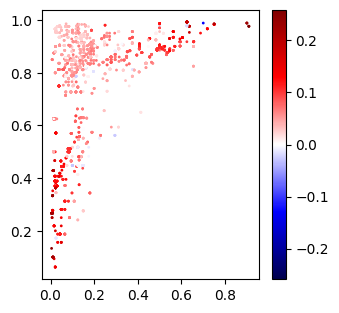

In [231]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

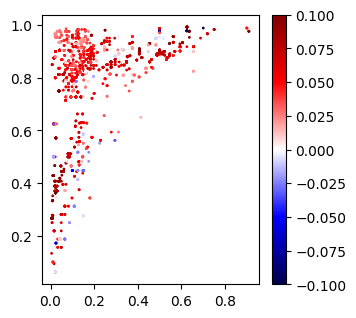

In [232]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_rmin_maxa_best']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_maxa_best']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

In [233]:
tmp = data[['auc', 'auc_min_max_best', 'auc_rmin_max_best', 'auc_min_maxa_best', 'auc_rmin_maxa_best', 'auc_onmin_maxa_best']].dropna()

tmp0 = data[['auc', 'auc_rmin_max_best']].dropna()
#tmp1 = data[['auc', 'auc_min_maxa_best']].dropna()
tmp2 = data[['auc', 'auc_rmin_maxa_best']].dropna()
tmp3 = data[['auc', 'auc_onmin_maxa_best']].dropna()
(r2_score(tmp['auc'], tmp['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp['auc'], tmp['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best']),
r2_score(tmp3['auc'], tmp3['auc_onmin_maxa_best']),
r2_score(data['auc'], data['auc_analytic_best']),
r2_score(data['auc'], data['auc_analytic_best_mod']))

(0.2016951593656372,
 0.7294726136637396,
 -0.31420047685979946,
 0.6217353841043465,
 0.8509251776818222,
 0.8287053311819297,
 0.6158768313786254)

In [234]:
len(tmp0), len(tmp1), len(tmp2), len(tmp3), len(data)

(2426, 2426, 2422, 2426, 2426)

In [235]:
(mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_maxa_best']))

(np.float64(0.07908246841511046),
 np.float64(0.04762114148825252),
 np.float64(0.10741511998215371),
 np.float64(0.057432986544898014))

In [236]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max_best']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_maxa_best']))

WilcoxonResult(statistic=np.float64(480584.0), pvalue=np.float64(1.121368161785916e-180))

In [237]:
results.append({'target': ['auc', 'auc', 'auc', 'auc'],
                'source': ['sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc'],
                'estimation': ['(min, max)', '(rmin, max)', '(min, maxa)', '(rmin, maxa)'],
                'r2': (r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best'])),
                'mape': (mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))})

KeyError: 'auc_min_maxa_best'

In [88]:
data[['best_acc', 'best_sens', 'best_spec', 'p', 'n', 'max_acc_min_max', 'max_acc_min_rmax'
      #, 'max_acc_min_onmax'
      ]]

,best_acc,best_sens,best_spec,p,n,max_acc_min_max,max_acc_min_rmax
5623,0.945578,1.00,0.000000,139,8,0.959456,0.949425
6532,0.900000,0.00,1.000000,10,90,0.926005,0.910025
8110,0.900000,1.00,0.000000,90,10,0.926394,0.911806
4513,0.900000,0.00,1.000000,10,90,0.926061,0.910298
368,0.806452,1.00,0.000000,25,6,0.859365,0.836048
...,...,...,...,...,...,...,...
3142,1.000000,1.00,1.000000,25,341,0.998216,0.998216
3417,1.000000,1.00,1.000000,68,4,0.998380,0.998380
1449,1.000000,1.00,1.000000,20,10,0.996667,0.996667
2944,0.943662,0.88,0.978261,25,46,0.921006,0.920826


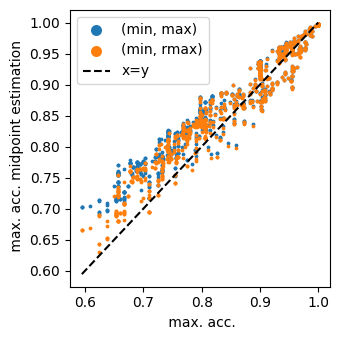

In [89]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['best_acc']), 
              min(data['max_acc_min_max']),
              min(data['max_acc_min_rmax']))
plt.scatter(data['best_acc'], data['max_acc_min_max'], label='(min, max)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_rmax'], label='(min, rmax)', s=3)
#plt.scatter(data['best_acc'], data['max_acc_min_onmax'], label='(min, onmax)', s=3)
plt.xlabel(f'{clabel} max. acc.')
plt.ylabel(f'{clabel} max. acc. midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-max-acc-midpoint.pdf')

In [241]:
tmp0 = data[['best_acc', 'max_acc_min_max']].dropna()
tmp1 = data[['best_acc', 'max_acc_min_rmax']].dropna()
(r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(0.7825657359542172, 0.8264817338142896)

In [91]:
(mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(np.float64(0.04899950493681104), np.float64(0.03854606442950721))

In [92]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['best_acc'] - tmp['max_acc_min_max']), 
         np.abs(tmp['best_acc'] - tmp['max_acc_min_rmax']))

WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [93]:
results.append({'target': ['max. acc', 'max. acc'],
                'source': ['auc', 'auc'],
                'estimation': ['(min, max)', '(min, rmax)'],
                'r2': (r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax'])),
                'mape': (mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))})

In [94]:
results = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1]), pd.DataFrame(results[2])])

In [95]:
results.to_csv(f'results-midpoints-{label}.csv', index=False)